# Connect With Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# This is Necessery Library and other resoursc


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# Read Data from CSV File


In [ ]:
csv_file_path = '/content/drive/MyDrive/DIU/Registured Course /7th Semester/Artificial Intelligence Lab/Lab Performance 2/UCI Heart Disease Data.csv'
df = pd.read_csv(csv_file_path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Data Cleaning , Drop Unnecessery Data


In [ ]:
df = df.drop(['id'], axis=1)

## Checking null Value

In [ ]:
print(df.isnull().sum())
df.shape

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


(920, 15)

# Delete Null Value of of the row

In [ ]:
df = df.dropna()
print(df.isnull().sum())
df.shape

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


(299, 15)

### Remove Duplicate row

In [ ]:
print(f"Shape before removing duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Shape before removing duplicates: (299, 15)
Shape after removing duplicates: (299, 15)


## Current Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   dataset   299 non-null    object 
 3   cp        299 non-null    object 
 4   trestbps  299 non-null    float64
 5   chol      299 non-null    float64
 6   fbs       299 non-null    object 
 7   restecg   299 non-null    object 
 8   thalch    299 non-null    float64
 9   exang     299 non-null    object 
 10  oldpeak   299 non-null    float64
 11  slope     299 non-null    object 
 12  ca        299 non-null    float64
 13  thal      299 non-null    object 
 14  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 37.4+ KB


# Set Feature X and Target Y

In [ ]:
X = df.drop(['num'], axis=1)
Y= df['num']

## LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

binary_cols = []
multi_class_cols = []

for col in categorical_cols:
    if X[col].nunique() <= 2:
        binary_cols.append(col)
    else:
        multi_class_cols.append(col)

print(f"Binary categorical columns: {binary_cols}")
print(f"Multi-class categorical columns: {multi_class_cols}")

Binary categorical columns: ['sex', 'fbs', 'exang']
Multi-class categorical columns: ['dataset', 'cp', 'restecg', 'slope', 'thal']


In [ ]:
label_encoder = LabelEncoder()
for col in binary_cols:
    X[col] = label_encoder.fit_transform(X[col])

X = pd.get_dummies(X, columns=multi_class_cols, drop_first=True)

display(X.head())

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,dataset_Hungary,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,False,False,False,False,True,False,False,False,False,False,False
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,False,False,False,False,False,False,False,True,False,True,False
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,False,False,False,False,False,False,False,True,False,False,True
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,False,False,False,True,False,True,False,False,False,True,False
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,False,False,True,False,False,False,False,False,True,True,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   sex                       299 non-null    int64  
 2   trestbps                  299 non-null    float64
 3   chol                      299 non-null    float64
 4   fbs                       299 non-null    int64  
 5   thalch                    299 non-null    float64
 6   exang                     299 non-null    int64  
 7   oldpeak                   299 non-null    float64
 8   ca                        299 non-null    float64
 9   dataset_Hungary           299 non-null    bool   
 10  dataset_VA Long Beach     299 non-null    bool   
 11  cp_atypical angina        299 non-null    bool   
 12  cp_non-anginal            299 non-null    bool   
 13  cp_typical angina         299 non-null    bool   
 14  restecg_normal 

## Feature Scaling with StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame with original column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

display(X_scaled.head())

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,dataset_Hungary,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,0.940446,0.687682,0.749760,-0.262867,2.439977,0.029124,-0.703562,1.069475,-0.718306,-0.057928,-0.057928,-0.442719,-0.619886,3.464102,-0.996661,-0.116445,-0.932068,-0.932068,-1.102186,-0.801784
1,1.384143,0.687682,1.596354,0.747722,-0.409840,-1.790447,1.421338,0.380309,2.487269,-0.057928,-0.057928,-0.442719,-0.619886,-0.288675,-0.996661,-0.116445,1.072884,-0.932068,0.907288,-0.801784
2,1.384143,0.687682,-0.661231,-0.339138,-0.409840,-0.880662,1.421338,1.327912,1.418744,-0.057928,-0.057928,-0.442719,-0.619886,-0.288675,-0.996661,-0.116445,1.072884,-0.932068,-1.102186,1.247219
3,-1.943588,0.687682,-0.096835,0.061285,-0.409840,1.632079,-0.703562,2.103224,-0.718306,-0.057928,-0.057928,-0.442719,1.613199,-0.288675,1.003350,-0.116445,-0.932068,-0.932068,0.907288,-0.801784
4,-1.499891,-1.454161,-0.096835,-0.815830,-0.409840,0.982232,-0.703562,0.294163,-0.718306,-0.057928,-0.057928,2.258770,-0.619886,-0.288675,-0.996661,-0.116445,-0.932068,1.072884,0.907288,-0.801784


## Training Dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=42)

# 4. Apply Five Machine Learning Algorithms
## Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, Y_train)
Y_pred_lr = logistic_model.predict(X_test_scaled)

accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f"Accuracy: {accuracy_lr}")

Accuracy: 0.6166666666666667


## K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled_knn = scaler.fit_transform(X_train)
X_test_scaled_knn = scaler.transform(X_test)

knn_model = KNeighborsClassifier()

knn_model.fit(X_train_scaled_knn, Y_train)
Y_pred_knn = knn_model.predict(X_test_scaled_knn)

accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.5833333333333334


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, Y_train)
Y_pred_dt = decision_tree_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.5166666666666667


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, Y_train)
Y_pred_rf = random_forest_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.6166666666666667


## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, Y_train)
Y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.6


# 5. Model Result Analysis (Mandatory)

## Confusion Matrix for Logistic Regression

In [ ]:
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(Y_test, Y_pred_lr))

Confusion Matrix for Logistic Regression:
 [[32  2  1  0  0]
 [ 2  5  2  4  0]
 [ 1  2  0  1  1]
 [ 0  2  1  0  1]
 [ 1  0  1  1  0]]


### Confusion Matrix for K-Nearest Neighbors

In [ ]:
print("Confusion Matrix for K-Nearest Neighbors:\n", confusion_matrix(Y_test, Y_pred_knn))

Confusion Matrix for K-Nearest Neighbors:
 [[31  2  1  1  0]
 [ 4  3  3  3  0]
 [ 1  2  1  0  1]
 [ 1  1  2  0  0]
 [ 0  2  0  1  0]]


### Confusion Matrix for Decision Tree


In [ ]:
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test, Y_pred_dt))

Confusion Matrix for Decision Tree:
 [[28  4  2  1  0]
 [ 3  0  5  3  2]
 [ 0  1  2  2  0]
 [ 0  2  1  1  0]
 [ 0  2  1  0  0]]


### Confusion Matrix for Random Forest Classifier

In [ ]:
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(Y_test, Y_pred_rf))

Confusion Matrix for Decision Tree:
 [[33  2  0  0  0]
 [ 7  1  4  1  0]
 [ 1  1  3  0  0]
 [ 1  2  1  0  0]
 [ 0  1  2  0  0]]


#  Precision, Recall, F1-score

Logistic Regression

In [ ]:
report_lr = classification_report(Y_test, Y_pred_lr, output_dict=True)
precision_lr = report_lr['weighted avg']['precision']
recall_lr = report_lr['weighted avg']['recall']
f1_score_lr = report_lr['weighted avg']['f1-score']

print(f"Logistic Regression Precision (weighted avg): {precision_lr:.2f}")
print(f"Logistic Regression Recall (weighted avg): {recall_lr:.2f}")
print(f"Logistic Regression F1-score (weighted avg): {f1_score_lr:.2f}")

Logistic Regression Precision (weighted avg): 0.62
Logistic Regression Recall (weighted avg): 0.62
Logistic Regression F1-score (weighted avg): 0.62


K-Nearest Neighbors

In [ ]:
report_knn = classification_report(Y_test, Y_pred_knn, output_dict=True)
precision_knn = report_knn['weighted avg']['precision']
recall_knn = report_knn['weighted avg']['recall']
f1_score_knn = report_knn['weighted avg']['f1-score']

print(f"K-Nearest Neighbors Precision (weighted avg): {precision_knn:.2f}")
print(f"K-Nearest Neighbors Recall (weighted avg): {recall_knn:.2f}")
print(f"K-Nearest Neighbors F1-score (weighted avg): {f1_score_knn:.2f}")

K-Nearest Neighbors Precision (weighted avg): 0.57
K-Nearest Neighbors Recall (weighted avg): 0.58
K-Nearest Neighbors F1-score (weighted avg): 0.57


Decision Tree Precision

In [ ]:
report_dt = classification_report(Y_test, Y_pred_dt, output_dict=True)
precision_dt = report_dt['weighted avg']['precision']
recall_dt = report_dt['weighted avg']['recall']
f1_score_dt = report_dt['weighted avg']['f1-score']

print(f"Decision Tree Precision (weighted avg): {precision_dt:.2f}")
print(f"Decision Tree Recall (weighted avg): {recall_dt:.2f}")
print(f"Decision Tree F1-score (weighted avg): {f1_score_dt:.2f}")

Decision Tree Precision (weighted avg): 0.55
Decision Tree Recall (weighted avg): 0.52
Decision Tree F1-score (weighted avg): 0.53


Random Forest Classifier

In [ ]:
report_rf = classification_report(Y_test, Y_pred_dt, output_dict=True)
precision_rf = report_rf['weighted avg']['precision']
recall_rf = report_rf['weighted avg']['recall']
f1_score_rf = report_rf['weighted avg']['f1-score']

print(f"Decision Tree Precision (weighted avg): {precision_rf:.2f}")
print(f"Decision Tree Recall (weighted avg): {recall_rf:.2f}")
print(f"Decision Tree F1-score (weighted avg): {f1_score_rf:.2f}")

Decision Tree Precision (weighted avg): 0.55
Decision Tree Recall (weighted avg): 0.52
Decision Tree F1-score (weighted avg): 0.53


Support Vector Machine Precision

In [ ]:
report_svm = classification_report(Y_test, Y_pred_svm, output_dict=True)
precision_svm = report_svm['weighted avg']['precision']
recall_svm = report_svm['weighted avg']['recall']
f1_score_svm = report_svm['weighted avg']['f1-score']

print(f"Support Vector Machine Precision (weighted avg): {precision_svm:.2f}")
print(f"Support Vector Machine Recall (weighted avg): {recall_svm:.2f}")
print(f"Support Vector Machine F1-score (weighted avg): {f1_score_svm:.2f}")

Support Vector Machine Precision (weighted avg): 0.54
Support Vector Machine Recall (weighted avg): 0.60
Support Vector Machine F1-score (weighted avg): 0.56


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## ROC Curve (at least one classifier)

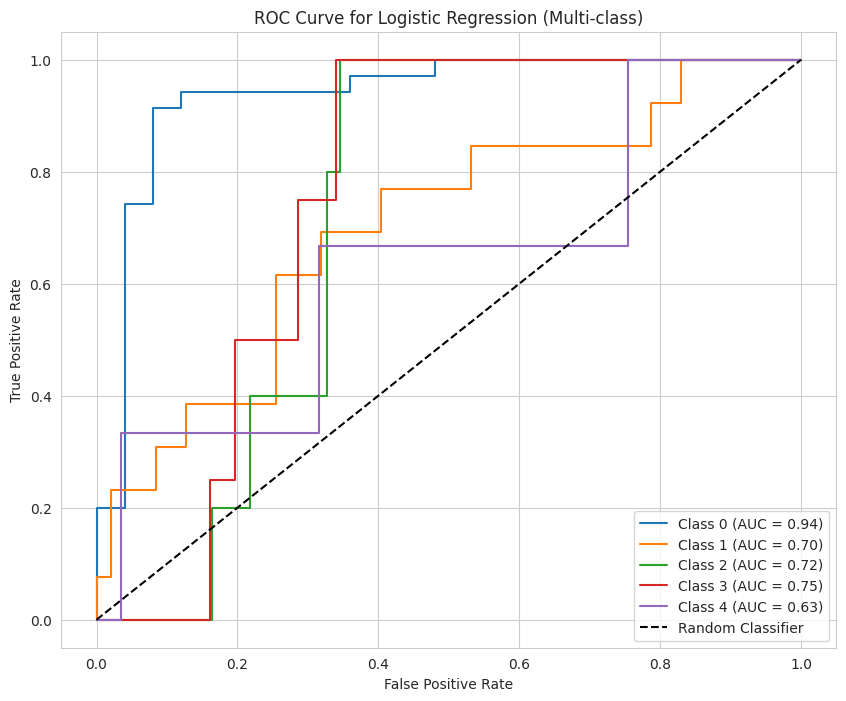

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
Y_pred_proba_lr = logistic_model.predict_proba(X_test_scaled)
# Get the number of classes
n_classes = Y.nunique()
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test, Y_pred_proba_lr[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (Multi-class)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Loss vs Validation Loss Curve (or Learning Curve)

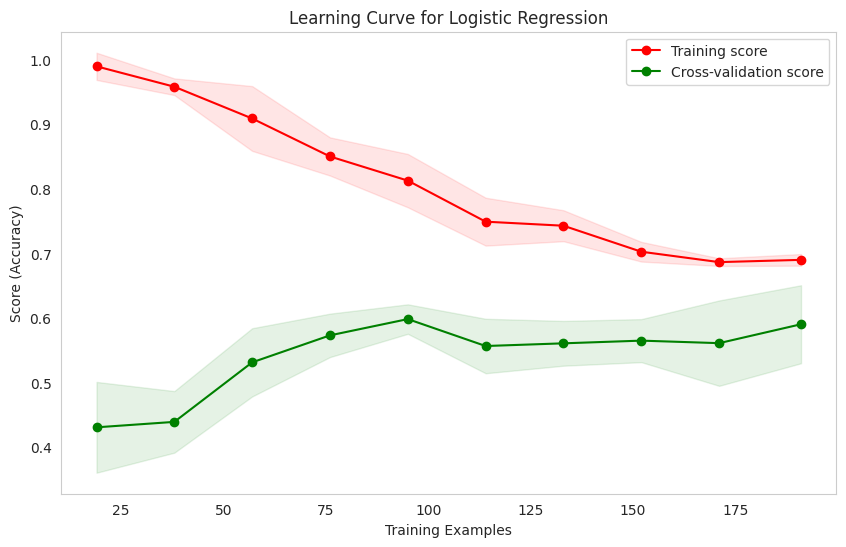

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the model (Logistic Regression in this case)
model_lr = LogisticRegression(max_iter=1000, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    model_lr, X_train_scaled, Y_train, cv=5, n_jobs=-1, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Score (Accuracy)')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()

# 6. Visualization Requirements


## Histograms for Feature Distribution

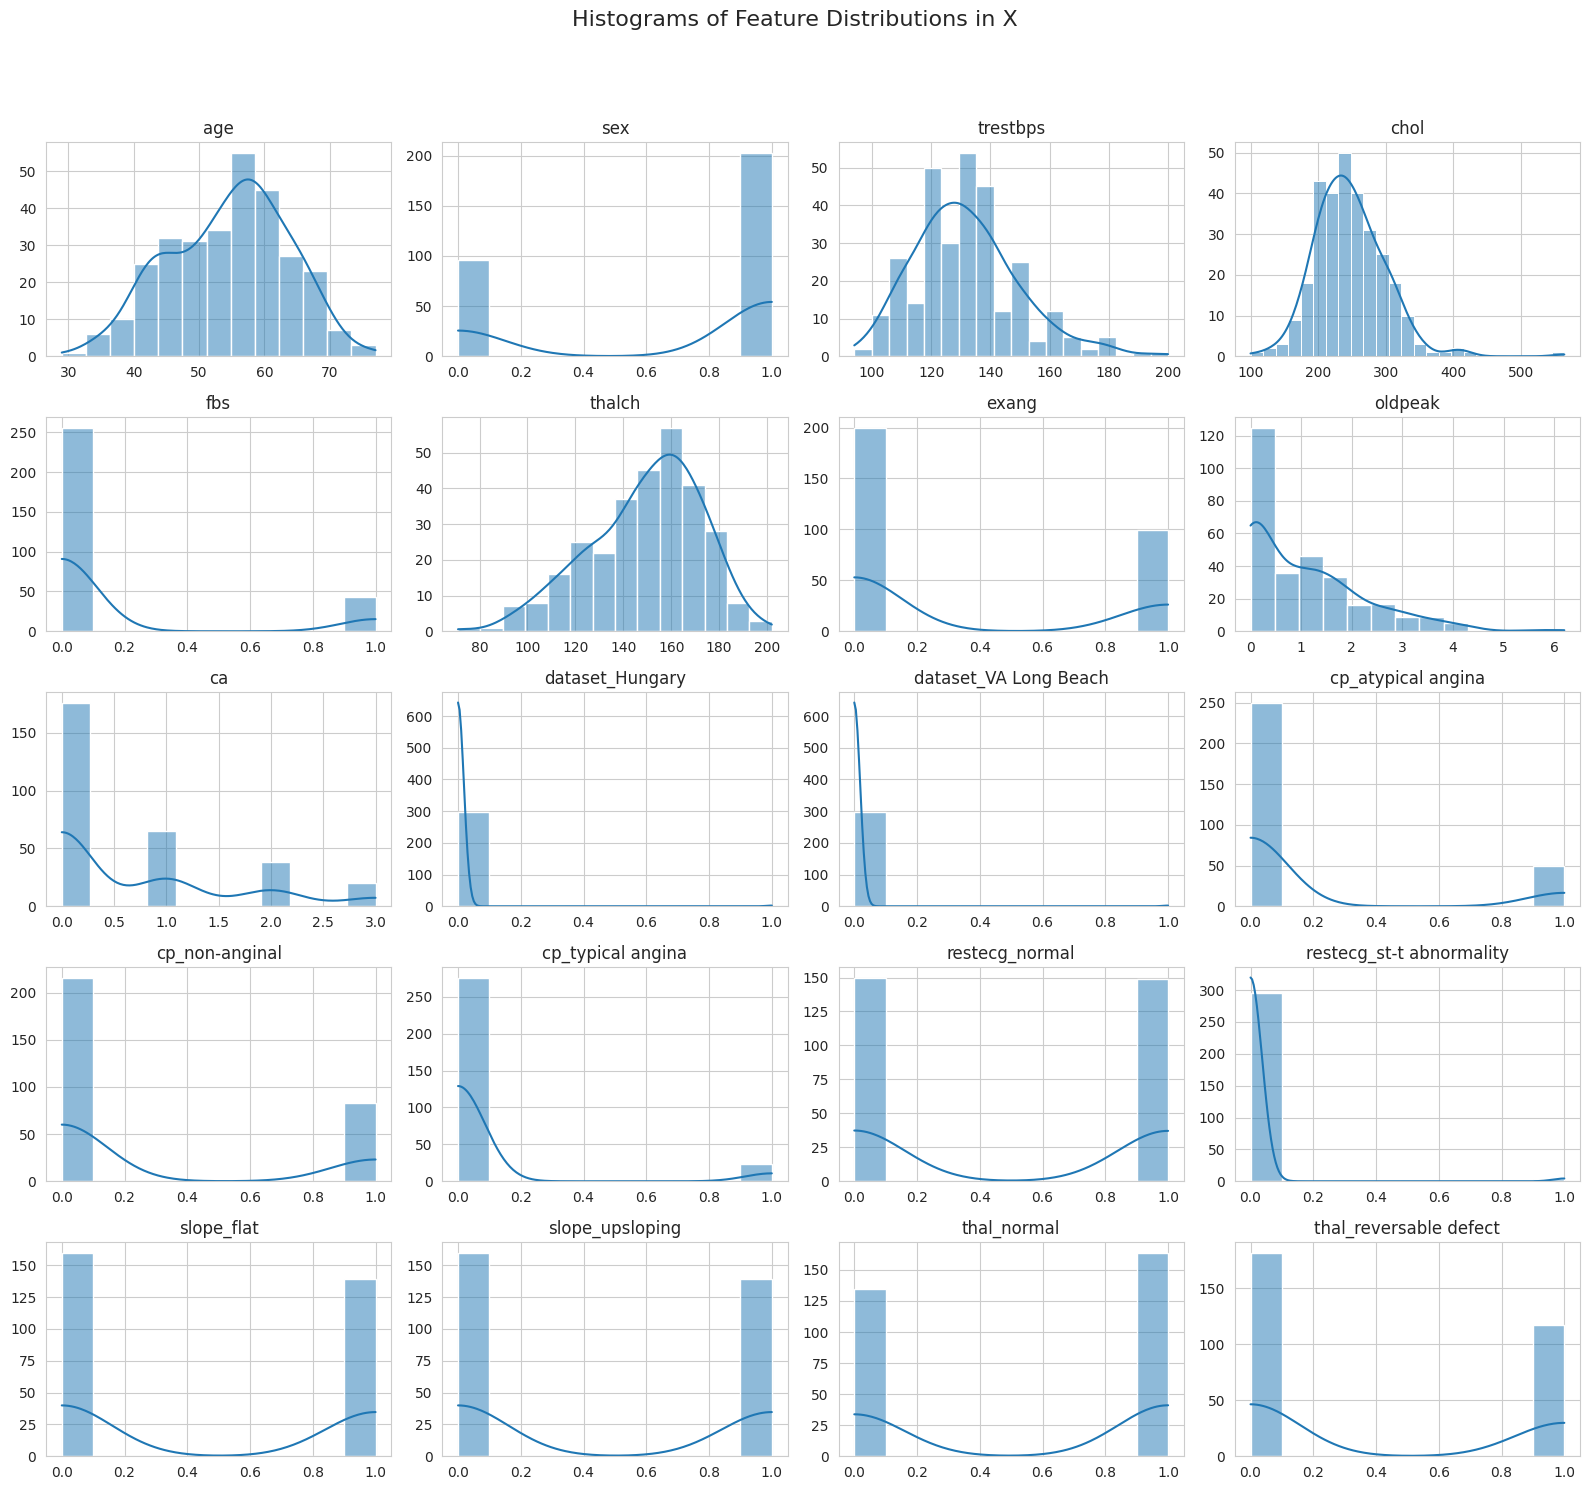

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

num_features = X.shape[1]
n_cols = 4  # You can adjust this for optimal layout
n_rows = (num_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))
plt.suptitle('Histograms of Feature Distributions in X', y=1.02, fontsize=16)

for i, column in enumerate(X.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(X[column], kde=True)
    plt.title(column)
    plt.xlabel('') # Remove x-label to avoid clutter
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## Correlation Heatmap

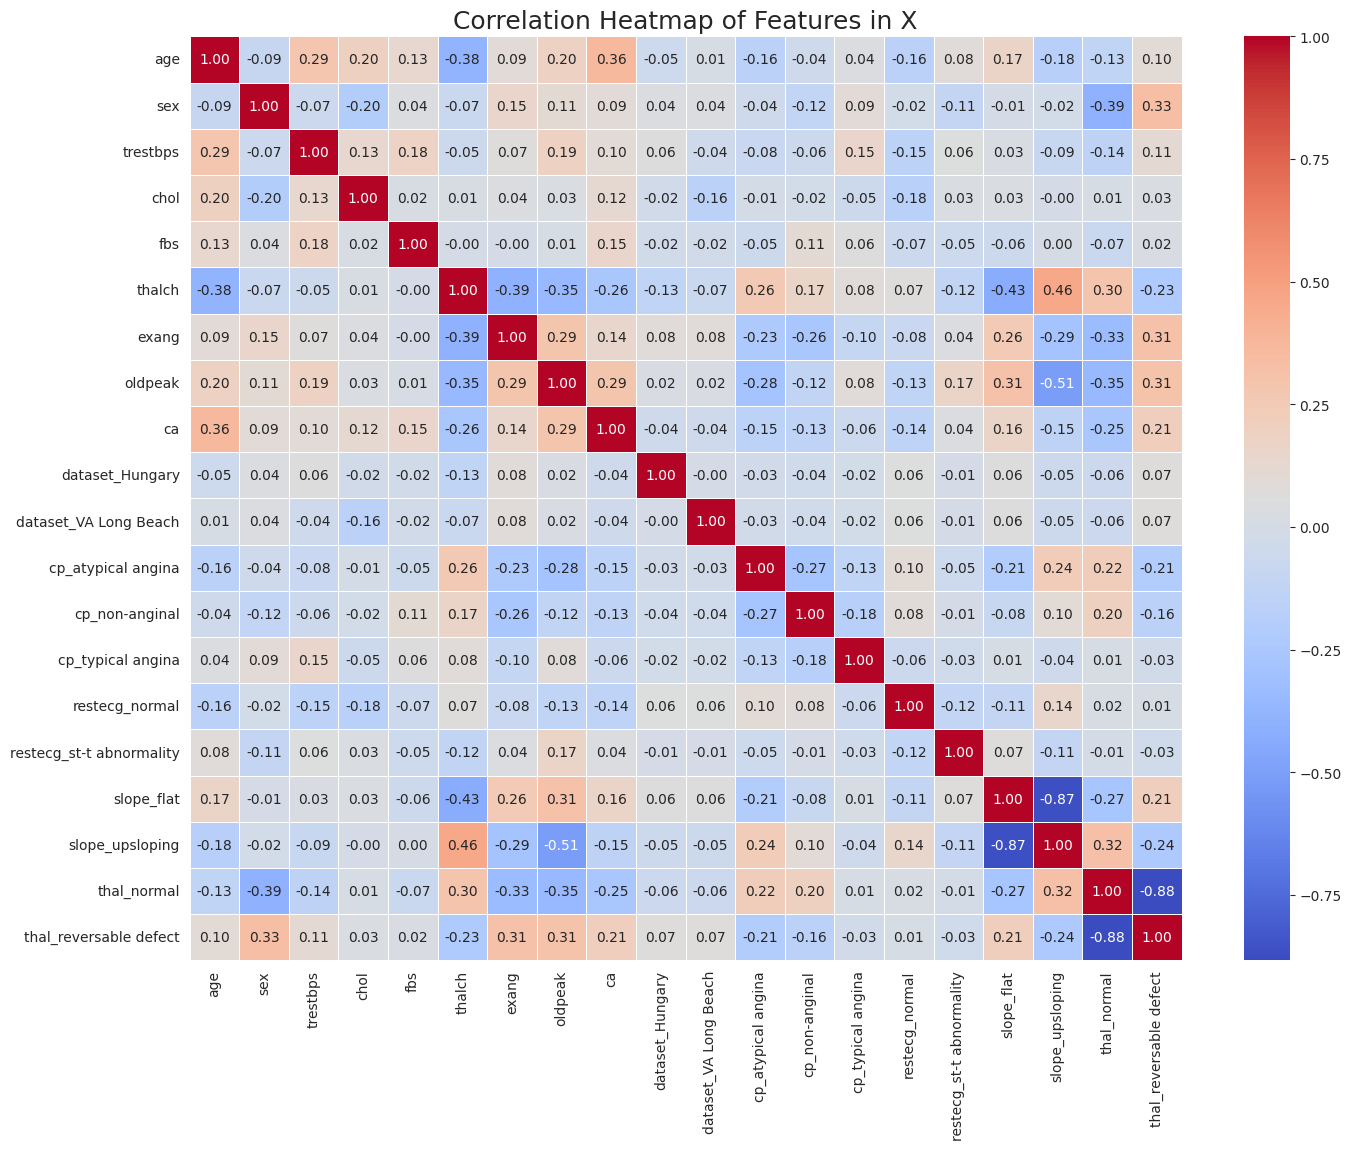

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()

plt.figure(figsize=(16, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features in X', fontsize=18)
plt.show()

## Scatter Plots

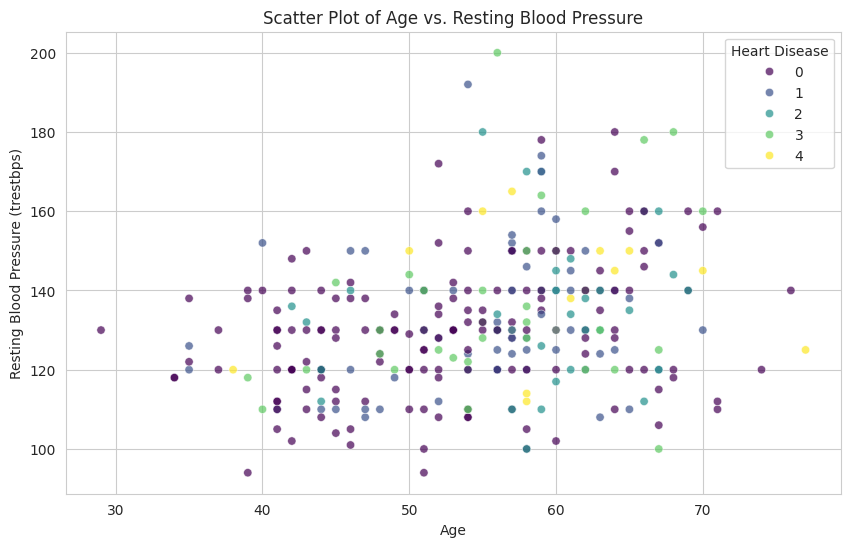

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='trestbps', data=X, hue=Y, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.grid(True)
plt.legend(title='Heart Disease')
plt.show()

## Pairplot (Optional)


<Figure size 1500x1500 with 0 Axes>

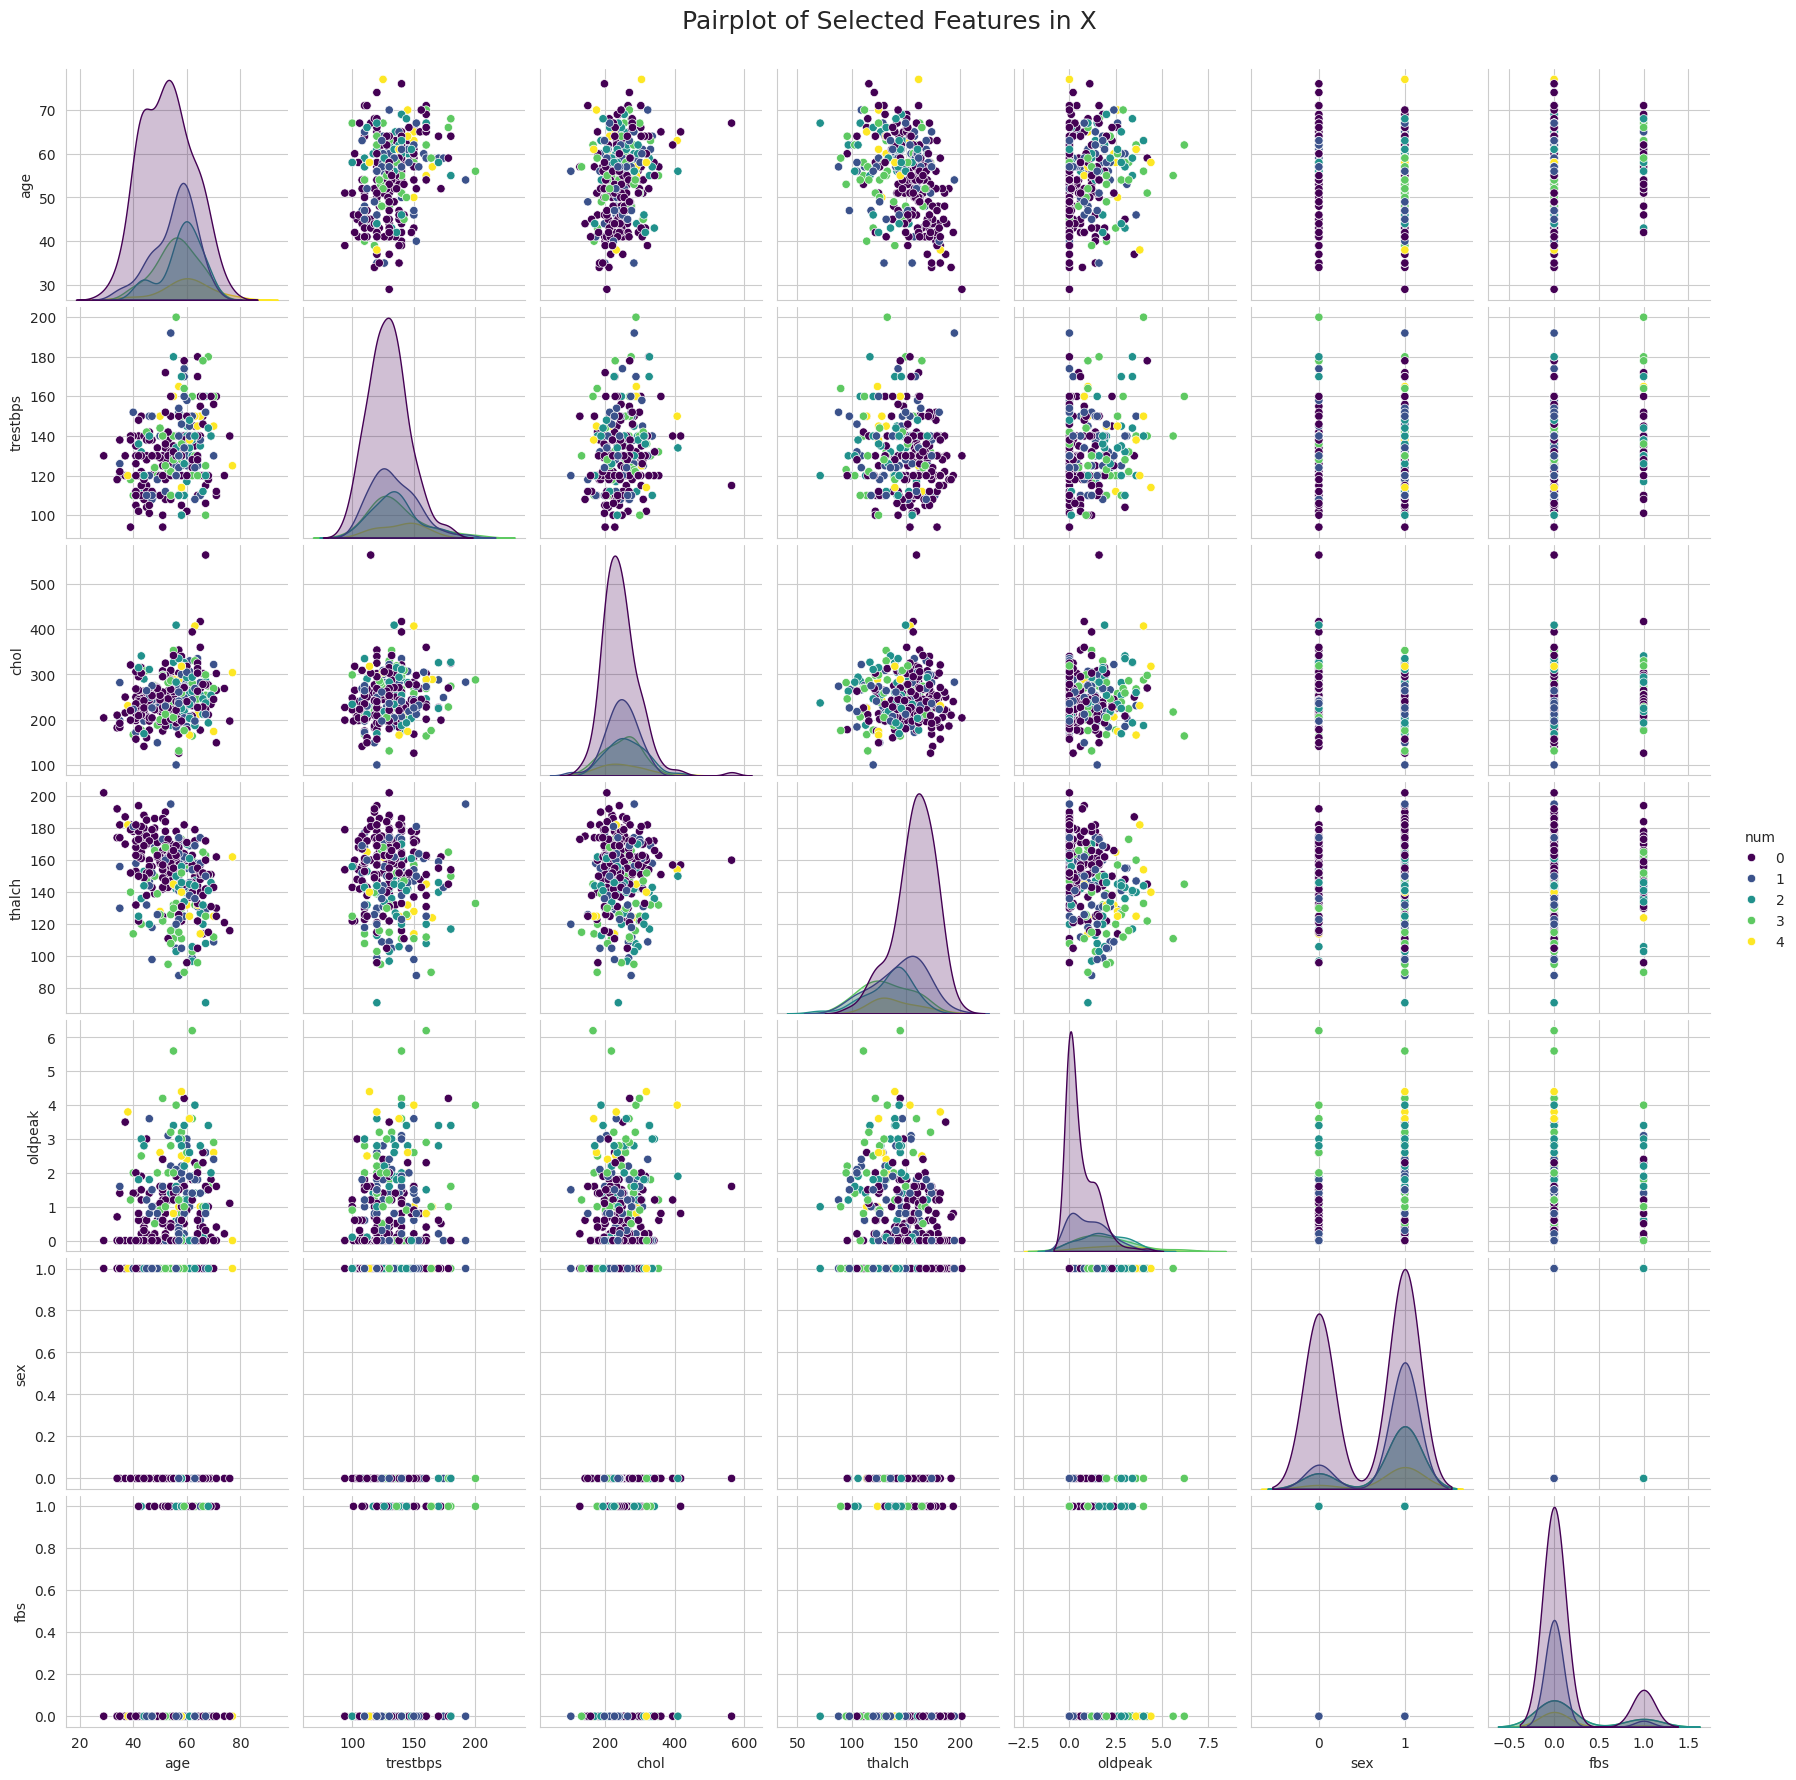

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex', 'fbs']
df_subset = X[selected_features].copy()
df_subset['num'] = Y # Add the target variable to color the points

plt.figure(figsize=(15, 15))
sns.pairplot(df_subset, hue='num', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features in X', y=1.02, fontsize=18)
plt.show()